In [1]:
import numpy as np

In [2]:
import pandas as pd


In [5]:
np.random.seed(47)

In [6]:
employee=[f'epy_{i}'for i in range(1,31)]

In [8]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [9]:
employee

['epy_1',
 'epy_2',
 'epy_3',
 'epy_4',
 'epy_5',
 'epy_6',
 'epy_7',
 'epy_8',
 'epy_9',
 'epy_10',
 'epy_11',
 'epy_12',
 'epy_13',
 'epy_14',
 'epy_15',
 'epy_16',
 'epy_17',
 'epy_18',
 'epy_19',
 'epy_20',
 'epy_21',
 'epy_22',
 'epy_23',
 'epy_24',
 'epy_25',
 'epy_26',
 'epy_27',
 'epy_28',
 'epy_29',
 'epy_30']

In [10]:
data={
    "Date":np.tile(dates,len(employee)),
    "employee_id":np.repeat(employee,len(dates)),
    "working_hours":np.random.normal(loc=30,scale=5,size=len(dates)*len(employee))
}

In [11]:
df=pd.DataFrame(data)

In [12]:
df

,Date,employee_id,working_hours
0,2025-07-01,epy_1,25.759953
1,2025-07-02,epy_1,36.529532
2,2025-07-03,epy_1,34.621040
3,2025-07-04,epy_1,33.202059
4,2025-07-05,epy_1,24.726315
...,...,...,...
895,2025-07-26,epy_30,43.258695
896,2025-07-27,epy_30,33.433610
897,2025-07-28,epy_30,28.698934
898,2025-07-29,epy_30,26.602264


In [28]:
row=df.iloc[25]
row

Date             2025-07-26 00:00:00
employee_id                    epy_1
working_hours              34.537222
Name: 25, dtype: object

In [15]:
 df.to_csv("employee_working_hours.csv",index=False)

In [17]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [18]:
df_csv

,Date,employee_id,working_hours
0,2025-07-01,epy_1,25.759953
1,2025-07-02,epy_1,36.529532
2,2025-07-03,epy_1,34.621040
3,2025-07-04,epy_1,33.202059
4,2025-07-05,epy_1,24.726315
...,...,...,...
895,2025-07-26,epy_30,43.258695
896,2025-07-27,epy_30,33.433610
897,2025-07-28,epy_30,28.698934
898,2025-07-29,epy_30,26.602264


In [19]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["employee_id"].nunique())

         Date employee_id  working_hours
0  2025-07-01       epy_1      25.759953
1  2025-07-02       epy_1      36.529532
2  2025-07-03       epy_1      34.621040
3  2025-07-04       epy_1      33.202059
4  2025-07-05       epy_1      24.726315
       working_hours
count     900.000000
mean       30.181230
std         4.930986
min        15.660535
25%        26.855881
50%        30.207036
75%        33.322614
max        44.760327
30


In [21]:
total_hours = df_csv.groupby("employee_id")["working_hours"].sum().sort_values(ascending=False)
print(total_hours)

employee_id
epy_11    952.602286
epy_3     939.470828
epy_29    932.026009
epy_4     931.591632
epy_13    930.943932
epy_12    926.304226
epy_30    925.597182
epy_26    925.333328
epy_27    922.724076
epy_5     921.063223
epy_20    919.201315
epy_14    915.925813
epy_8     912.221414
epy_24    912.192925
epy_15    912.176374
epy_16    909.512716
epy_23    908.951959
epy_25    907.468284
epy_17    906.605665
epy_6     905.785698
epy_19    890.754459
epy_9     889.782432
epy_22    886.606428
epy_1     881.760238
epy_10    870.467638
epy_7     869.856979
epy_2     868.543587
epy_28    867.084009
epy_18    860.957995
epy_21    859.594760
Name: working_hours, dtype: float64


In [22]:
avg_daily = df_csv.groupby("employee_id")["working_hours"].mean()

In [23]:
threshold_low =5
threshold_high = 9
df_csv["low_hours_flag"] = df_csv["working_hours"] < threshold_low
df_csv["high_hours_flag"] = df_csv["working_hours"] > threshold_high

print(df_csv[df_csv["low_hours_flag"] | df_csv["high_hours_flag"]].head())

         Date employee_id  working_hours  low_hours_flag  high_hours_flag
0  2025-07-01       epy_1      25.759953           False             True
1  2025-07-02       epy_1      36.529532           False             True
2  2025-07-03       epy_1      34.621040           False             True
3  2025-07-04       epy_1      33.202059           False             True
4  2025-07-05       epy_1      24.726315           False             True


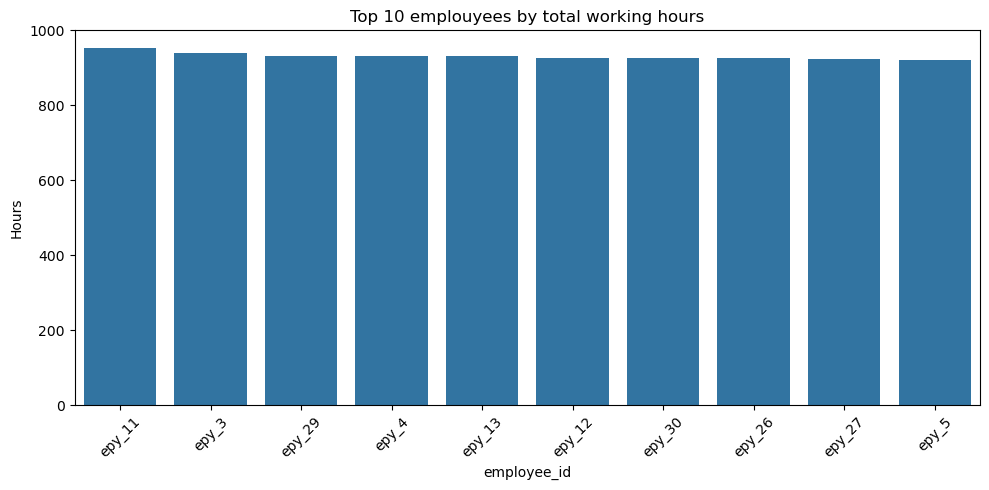

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 emplouyees by total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [ ]:
Grade = df.loc[(df[""] == "" )]